In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [34]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Data Preprocessing
### Preprocessed by ITBIN-2211-0233

Training Image Preprocessing

In [35]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [36]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [38]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[169.75 162.75 169.75]
   [165.5  158.5  165.5 ]
   [154.75 147.75 154.75]
   ...
   [175.25 166.25 169.25]
   [167.75 158.75 161.75]
   [173.   164.   167.  ]]

  [[162.25 155.25 162.25]
   [168.5  161.5  168.5 ]
   [161.25 154.25 161.25]
   ...
   [178.   169.   172.  ]
   [158.25 149.25 152.25]
   [159.   150.   153.  ]]

  [[164.5  157.5  164.5 ]
   [167.   160.   167.  ]
   [164.   157.   164.  ]
   ...
   [167.   158.   161.  ]
   [163.   154.   157.  ]
   [181.75 172.75 175.75]]

  ...

  [[160.   150.   149.  ]
   [157.   147.   146.  ]
   [152.5  142.5  141.5 ]
   ...
   [144.   130.   129.  ]
   [135.75 121.75 120.75]
   [141.5  127.5  126.5 ]]

  [[153.5  143.5  142.5 ]
   [154.5  144.5  143.5 ]
   [158.5  148.5  147.5 ]
   ...
   [140.   126.   125.  ]
   [149.5  135.5  134.5 ]
   [131.5  117.5  116.5 ]]

  [[159.   149.   148.  ]
   [162.   152.   151.  ]
   [159.75 149.75 148.75]
   ...
   [140.25 126.25 125.25]
   [148.25 134.25 133.25]
   [136.5  122.5  12

Building Model

In [39]:

from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.models import Sequential



In [40]:
model = Sequential()

###  To avoid overshooting

1.Choose default learning rate as 0.0001

2.There may be chance of underfitting, so increase the number of neurons

3.Add more convolution layer to extrat more feature from images, there may be some posibility that model unable to capture relevent feature or model is confusing due to lack of feature. so feed with more feature.


## Building convalution Layer
BUILD BY ITBIN-2211-0256

In [41]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [43]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Dropout(0.25)) # To avoid overfitting

In [47]:

model.add(Flatten())



In [48]:
model.add(Dense(units=1500,activation='relu'))

In [49]:
model.add(Dropout(0.4))

In [50]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

## MODEL TRAINING 

### Model Trained by ITBIN-2211-0258


In [54]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 131s 56ms/step - loss: 1.4384 - accuracy: 0.5805 - val_loss: 0.6650 - val_accuracy: 0.7911
Epoch 2/10
2197/2197 [==============================] - 122s 55ms/step - loss: 0.4704 - accuracy: 0.8494 - val_loss: 0.4397 - val_accuracy: 0.8625
Epoch 3/10
2197/2197 [==============================] - 122s 56ms/step - loss: 0.2831 - accuracy: 0.9080 - val_loss: 0.2412 - val_accuracy: 0.9194
Epoch 4/10
2197/2197 [==============================] - 123s 56ms/step - loss: 0.1921 - accuracy: 0.9383 - val_loss: 0.1624 - val_accuracy: 0.9476
Epoch 5/10
2197/2197 [==============================] - 124s 56ms/step - loss: 0.1443 - accuracy: 0.9530 - val_loss: 0.1852 - val_accuracy: 0.9437
Epoch 6/10
2197/2197 [==============================] - 124s 57ms/step - loss: 0.1098 - accuracy: 0.9635 - val_loss: 0.1285 - val_accuracy: 0.9591
Epoch 7/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.0955 - accuracy: 0.9685 - val_loss: 0

## Model Saving

### Model Saved by ITBIN-2211-0258

In [28]:
model.save("trained_model.keras")

In [55]:
training_history.history

{'loss': [1.438422441482544,
  0.47040873765945435,
  0.28311365842819214,
  0.19207663834095,
  0.14433155953884125,
  0.10983818024396896,
  0.09550637751817703,
  0.07818663865327835,
  0.06855287402868271,
  0.05742232874035835],
 'accuracy': [0.5804679989814758,
  0.8494487404823303,
  0.9080304503440857,
  0.9382601976394653,
  0.9530407786369324,
  0.963454008102417,
  0.9684756994247437,
  0.9740521907806396,
  0.9772956967353821,
  0.9815492033958435],
 'val_loss': [0.664996862411499,
  0.4396786093711853,
  0.24124664068222046,
  0.16241614520549774,
  0.18520338833332062,
  0.12849436700344086,
  0.13195692002773285,
  0.1269971877336502,
  0.10947848111391068,
  0.12067609280347824],
 'val_accuracy': [0.7910881042480469,
  0.8625085353851318,
  0.919360339641571,
  0.9475870728492737,
  0.9437173008918762,
  0.9590826034545898,
  0.9587411880493164,
  0.9609037041664124,
  0.9671067595481873,
  0.9652856588363647]}

In [56]:
# Recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Data visualization

### visualized by ITBIN-2211-0286

#### 1.Accuracy Visualization

In [57]:
training_history.history['accuracy']

[0.5804679989814758,
 0.8494487404823303,
 0.9080304503440857,
 0.9382601976394653,
 0.9530407786369324,
 0.963454008102417,
 0.9684756994247437,
 0.9740521907806396,
 0.9772956967353821,
 0.9815492033958435]

In [60]:
training_history.history['val_accuracy']

[0.7910881042480469,
 0.8625085353851318,
 0.919360339641571,
 0.9475870728492737,
 0.9437173008918762,
 0.9590826034545898,
 0.9587411880493164,
 0.9609037041664124,
 0.9671067595481873,
 0.9652856588363647]

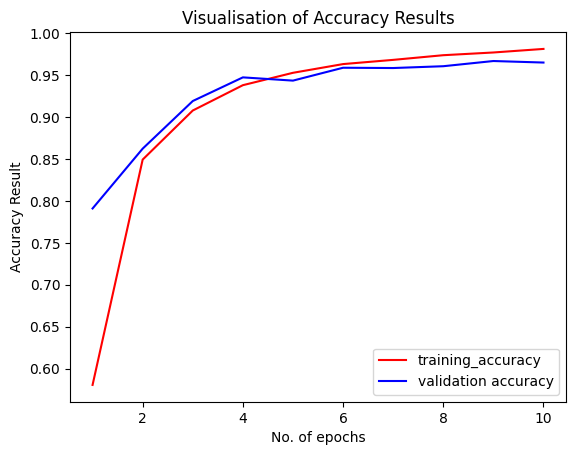

In [64]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualisation of Accuracy Results")
plt.legend()
plt.show()